In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("D:\\Learn\\DS102ML\\forest+fires\\processing_forestfires.csv")
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,4,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,5,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,0,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,0,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,1,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,5,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [3]:
class LinearRegression:
    def fit(self, X, y):
        cov = X.T @ X
        inv_cov = np.linalg.inv(cov)
        self.theta = inv_cov @ (X.T @ y)
    def predict(self, X):
        y_predict = self.theta.T @ X.T
        return y_predict
    def rmse(self,y_pred, y_test):
        rmse = np.square(y_pred - y_test).mean()**0.5
        return rmse

In [4]:
df.dtypes

X          int64
Y          int64
month      int64
day        int64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [5]:
def Standardize(x):
    for i in x.columns:
        if(x[i].dtypes == "float64" and i != "area"):
            x[i] = (x[i] - x[i].mean())/x[i].std()

In [6]:
Standardize(df)
df.head(10)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,4,-0.805180,-1.322045,-1.828706,-0.860113,-1.840857,51,1.497164,-0.073197,0.0
1,7,4,10,1,-0.008094,-1.178399,0.488418,-0.509195,-0.153130,33,-1.740070,-0.073197,0.0
2,7,4,10,5,-0.008094,-1.048806,0.560173,-0.509195,-0.738668,33,-1.516813,-0.073197,0.0
3,8,6,3,4,0.191177,-1.211188,-1.896429,-0.004751,-1.823636,97,-0.009824,0.602572,0.0
4,8,6,3,6,-0.243597,-0.930142,-1.796859,0.126843,-1.289763,99,-1.237741,-0.073197,0.0
5,8,6,8,6,0.299871,-0.399278,-0.241629,1.245392,0.570182,29,0.771577,-0.073197,0.0
6,8,6,8,0,0.299871,-0.343069,-0.210992,-0.114413,0.897394,27,-0.512154,-0.073197,0.0
7,8,6,8,0,0.154946,0.539103,0.242919,0.368098,-1.875301,86,-1.014483,-0.073197,0.0
8,8,6,9,1,0.064368,0.290846,0.583151,-0.443398,-0.996994,63,0.771577,-0.073197,0.0
9,7,5,9,5,0.336102,-0.357121,0.607338,-0.421466,0.673512,40,-0.009824,-0.073197,0.0


In [7]:
data = df.to_numpy()


In [8]:
train_size = int(0.8*len(df))
train_size

413

In [9]:
X_y_train = data[:train_size]

In [10]:
X_y_test = data[train_size:]

In [11]:
X_train = X_y_train[:,:12]
y_train = X_y_train[:,-1]

In [12]:
X_test = X_y_test[:,:12]
y_test = X_y_test[:,-1]

In [13]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
print(f"RSME = {lr.rmse(y_predict,y_test)}")

RSME = 79.92538705919264


## So sánh

#### RSME của dữ liệu chưa được chuẩn hóa
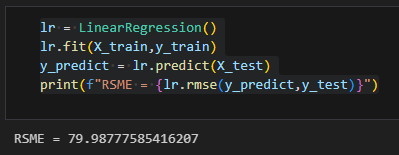

##### Có thể thấy dữ liệu đã được chuẩn hóa với kỳ vọng là 0 và phương sai là 1 cho ra kết quả tốt hơn, giúp cải thiện hiệu suất mô hình